# Fundamentos de Inteligência Artificial - Trabalho Prático 2

## Problema - Coloração de Grafos: 

O problema de coloração em grafos em sua forma mais tradicional consiste na rotulação (atribuição de uma cor) de vértices de um grafo, os quais estão sujeitos a restrições previamente definidas. A restrição usualmente imposta é que dois vértices vizinhos, isto é, que compartilham uma mesma aresta, não podem possuir a mesma cor.

Neste notebook, uma instância desse problema é modelada como um grafo de restrições (Constraint Graph), onde as arestas representam as restrições binárias entre os vértices (variáveis do problema). Para construir este grafo, utilizaremos a mesma estrutura de dados (class Graph) que foi fornecida no Estudo Dirigido 1 sobre Busca em Grafos.

In [1]:
class Edge:
    def __init__(self, u, v, w):
        self.u = u  # starting vertex
        self.v = v  # ending vertex
        self.w = w  # weight of the edge

    def __lt__(self, other):
        # This makes the edges comparable by weight for sorting
        return self.w < other.w

    def __str__(self):
        # String representation of an edge
        return f"{self.u} -> {self.v} ({self.w})"

    def __repr__(self):
        return self.__str__()

class Graph:
    def __init__(self):
        # Initialize a graph with no predefined number of vertices
        self.graph = {}  # key: vertex, value: list of edges

    def add_edge(self, u, v, w):
        # Add an edge from u to v with weight w
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []

        self.graph[u].append(Edge(u, v, w))

    def add_undirected_edge(self, u, v, w):
        # Add an undirected edge between u and v with weight w
        self.add_edge(u, v, w)
        self.add_edge(v, u, w)

    def __str__(self):
        # String representation of the entire graph
        result = []
        for u in self.graph:
            for edge in self.graph[u]:
                result.append(str(edge))
        return "\n".join(result)

    def get_edges(self):
        # Returns all edges in the graph
        edges = []
        for u in self.graph:
            for edge in self.graph[u]:
                edges.append(edge)
        return edges

    def out_degree(self, u):
        # Return the out-degree of vertex u
        if u in self.graph:
            return len(self.graph[u])
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")

    def in_degree(self, v):
        # Return the in-degree of vertex v
        in_deg = 0
        for u in self.graph:
            for edge in self.graph[u]:
                if edge.v == v:
                    in_deg += 1
        return in_deg

    def get_neighbors(self, u):
        # Returns the neighbors of vertex u
        if u in self.graph:
            return [edge.v for edge in self.graph[u]]
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")

### Instância do Problema de Coloração em Grafos: 

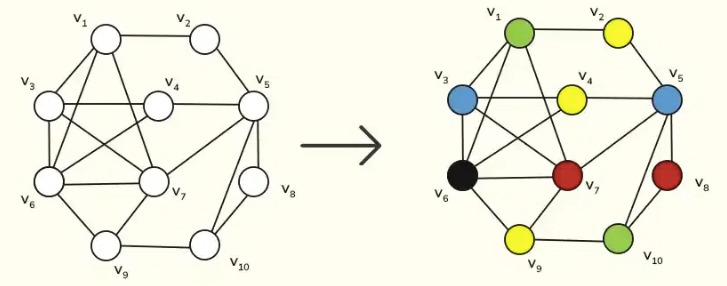

In [2]:
Example = Graph()

Example.add_undirected_edge("V1", "V2", 1)
Example.add_undirected_edge("V1", "V3", 1)
Example.add_undirected_edge("V1", "V6", 1)
Example.add_undirected_edge("V1", "V7", 1)
Example.add_undirected_edge("V2", "V5", 1)
Example.add_undirected_edge("V3", "V4", 1)
Example.add_undirected_edge("V3", "V6", 1)
Example.add_undirected_edge("V3", "V7", 1)
Example.add_undirected_edge("V4", "V5", 1)
Example.add_undirected_edge("V4", "V6", 1)
Example.add_undirected_edge("V5", "V7", 1)
Example.add_undirected_edge("V5", "V8", 1)
Example.add_undirected_edge("V5", "V10", 1)
Example.add_undirected_edge("V6", "V7", 1)
Example.add_undirected_edge("V6", "V9", 1)
Example.add_undirected_edge("V8", "V10", 1)
Example.add_undirected_edge("V9", "V10", 1)

In [3]:
print(Example)

V1 -> V2 (1)
V1 -> V3 (1)
V1 -> V6 (1)
V1 -> V7 (1)
V2 -> V1 (1)
V2 -> V5 (1)
V3 -> V1 (1)
V3 -> V4 (1)
V3 -> V6 (1)
V3 -> V7 (1)
V6 -> V1 (1)
V6 -> V3 (1)
V6 -> V4 (1)
V6 -> V7 (1)
V6 -> V9 (1)
V7 -> V1 (1)
V7 -> V3 (1)
V7 -> V5 (1)
V7 -> V6 (1)
V5 -> V2 (1)
V5 -> V4 (1)
V5 -> V7 (1)
V5 -> V8 (1)
V5 -> V10 (1)
V4 -> V3 (1)
V4 -> V5 (1)
V4 -> V6 (1)
V8 -> V5 (1)
V8 -> V10 (1)
V10 -> V5 (1)
V10 -> V8 (1)
V10 -> V9 (1)
V9 -> V6 (1)
V9 -> V10 (1)


***
### Implementação da Função contar_conflitos(grafo, coloracao). 

#### Entrada:

- o grafo (objeto da classe Graph)

- um dicionário coloracao, onde coloracao[vértice] = cor atribuída

#### Saída:

- número total de conflitos (arestas entre vértices de mesma cor)

In [4]:
def contar_conflitos(grafo, coloracao):
    conflitos = 0
    visitados = set()

    for u in grafo.graph:
        for vizinho in grafo.get_neighbors(u):
            if (u, vizinho) not in visitados and (vizinho, u) not in visitados:
                if coloracao[u] == coloracao[vizinho]:
                    conflitos += 1
                visitados.add((u, vizinho))
                visitados.add((vizinho, u))

    return conflitos

#### Explicação rápida:

- Percorremos todas as arestas do grafo.

- Para cada par (u, vizinho), verificamos se já contamos esse par (usando o conjunto visitados).

- Se os dois vértices tiverem a mesma cor, incrementamos o contador de conflitos.

Essa função será útil para guiar as heurísticas de busca que implementaremos a seguir. Vamos agora testar se ela funciona, passando como argumento uma coloração, ou seja, uma atribuição de cores a cada vértice na forma de um dicionário:

In [5]:
coloracao_exemplo = {
    "V1": "vermelho",
    "V2": "azul",
    "V3": "vermelho",
    "V4": "amarelo",
    "V5": "azul",
    "V6": "verde",
    "V7": "vermelho",
    "V8": "azul",
    "V9": "verde",
    "V10": "vermelho"
}

print("Conflitos:", contar_conflitos(Example, coloracao_exemplo))

Conflitos: 6


***
### Implementação da Função que gera uma atribuição (coloração) aleatória. 
- serve para gerar uma atribuição inicial para o problema de coloração de grafos.
- Entrada: Grafo de restrições e lista de possíveis cores para seus vértices.
- Saída: dicionário -> key: vertice, value: cor


In [6]:
import random

def gerar_coloracao_aleatoria(grafo, cores=["vermelho", "azul", "verde", "amarelo"]):
    coloracao = {}
    for vertice in grafo.graph.keys():
        coloracao[vertice] = random.choice(cores)
    return coloracao

In [7]:
# Gerar uma coloração aleatória
coloracao_aleatoria = gerar_coloracao_aleatoria(Example)

# Mostrar a coloração gerada
print("Coloração Aleatória:")
for vertice, cor in coloracao_aleatoria.items():
    print(f"{vertice}: {cor}")

# Contar conflitos
num_conflitos = contar_conflitos(Example, coloracao_aleatoria)
print("\nNúmero de conflitos:", num_conflitos)

Coloração Aleatória:
V1: vermelho
V2: verde
V3: azul
V6: verde
V7: vermelho
V5: verde
V4: amarelo
V8: azul
V10: vermelho
V9: verde

Número de conflitos: 3


***
### Utilidades para Instâncias Externas


In [8]:
from pathlib import Path


def carregar_instancia_col(caminho):
    caminho = Path(caminho)
    if not caminho.exists():
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho}")

    grafo = Graph()
    vertices = set()

    with caminho.open("r", encoding="utf-8", errors="ignore") as fh:
        for linha in fh:
            linha = linha.strip()
            if not linha or linha.startswith("c"):
                continue

            partes = linha.split()
            if partes[0] == "p" and len(partes) >= 3:
                num_vertices = int(partes[2])
                for i in range(1, num_vertices + 1):
                    rotulo = f"V{i}"
                    vertices.add(rotulo)
                    grafo.graph.setdefault(rotulo, [])
            elif partes[0] == "e" and len(partes) >= 3:
                u = f"V{partes[1]}"
                v = f"V{partes[2]}"
                vertices.update([u, v])
                grafo.add_undirected_edge(u, v, 1)

    for vertice in vertices:
        grafo.graph.setdefault(vertice, [])

    return grafo


def gerar_paleta_cores(qtd):
    base = [
        "vermelho",
        "azul",
        "verde",
        "amarelo",
        "laranja",
        "roxo",
        "rosa",
        "marrom",
        "cinza",
        "ciano",
        "magenta",
        "preto",
        "branco",
    ]
    if qtd <= len(base):
        return base[:qtd]

    paleta = base[:]
    for indice in range(qtd - len(base)):
        paleta.append(f"cor_{indice+1}")
    return paleta


# Heurísticas

Nesta etapa, você deverá implementar algumas heurísticas de busca para resolver o problema de coloração.

***

### Implementação das Heurísticas:

#### Random Walk (RW)
- Escolhe aleatoriamente uma variável e muda sua cor aleatoriamente.
- Se melhorar (reduzir conflitos), aceita.
- Senão, também pode aceitar (não é obrigatório ser só melhoria, você pode definir uma probabilidade mais baixa para aceitar pioras).

#### Best Improvement (BI)
- Testa TODAS as mudanças possíveis (todos vértices e cores).
- Escolhe a mudança que mais reduz conflitos.

#### First Improvement com Any Conflict (FI with AC):
- Escolhe aleatoriamente uma variável que está em conflito.
- Tenta todas as cores possíveis para ela.
- Escolhe a cor que mais reduz conflitos (best color para aquela variável).

#### Simulated Annealing (SA)
- Parecido com FI, mas aceita piores soluções com uma probabilidade que diminui com o tempo (controle de temperatura).

#### Algoritmo Genético (GA):
- Evolui um conjunto de soluções candidatas, denominado população;
- A cada passo, as soluções atuais interagem entre si, através dos operadores de recombinação (crossover) e mutação (mutation) para produzir uma nova população. 

#### Random Walk (RW)

In [9]:
def random_walk(grafo, coloracao_inicial, cores, max_iter=1000, prob_aceitar_piora=0.1):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)
    vertices = list(grafo.graph.keys())

    if not vertices:
        return coloracao, conflitos

    for _ in range(max_iter):
        vertice = random.choice(vertices)
        cores_possiveis = [cor for cor in cores if cor != coloracao[vertice]]
        if not cores_possiveis:
            continue

        nova_cor = random.choice(cores_possiveis)
        vizinho = coloracao.copy()
        vizinho[vertice] = nova_cor
        novos_conflitos = contar_conflitos(grafo, vizinho)

        if novos_conflitos <= conflitos or random.random() < prob_aceitar_piora:
            coloracao = vizinho
            conflitos = novos_conflitos

        if conflitos == 0:
            break

    return coloracao, conflitos

#### Best Improvement (BI)

In [10]:
def best_improvement(grafo, coloracao_inicial, cores, max_iter=1000):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)
    vertices = list(grafo.graph.keys())

    if not vertices:
        return coloracao, conflitos

    for _ in range(max_iter):
        melhor_vizinho = None
        melhor_conflitos = conflitos

        for vertice in vertices:
            cor_atual = coloracao[vertice]
            for cor in cores:
                if cor == cor_atual:
                    continue

                vizinho = coloracao.copy()
                vizinho[vertice] = cor
                novos_conflitos = contar_conflitos(grafo, vizinho)

                if novos_conflitos < melhor_conflitos:
                    melhor_conflitos = novos_conflitos
                    melhor_vizinho = vizinho

        if melhor_vizinho is None or melhor_conflitos >= conflitos:
            break

        coloracao = melhor_vizinho
        conflitos = melhor_conflitos

        if conflitos == 0:
            break

    return coloracao, conflitos

#### First Improvement with Random Search (FI-RS)


In [11]:
def first_improvement_rs(grafo, coloracao_inicial, cores, max_iter=1000):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)
    vertices = list(grafo.graph.keys())

    if not vertices:
        return coloracao, conflitos

    for _ in range(max_iter):
        vertice = random.choice(vertices)
        cor_atual = coloracao[vertice]
        cores_possiveis = [cor for cor in cores if cor != cor_atual]
        if not cores_possiveis:
            continue

        nova_cor = random.choice(cores_possiveis)
        vizinho = coloracao.copy()
        vizinho[vertice] = nova_cor
        novos_conflitos = contar_conflitos(grafo, vizinho)

        if novos_conflitos < conflitos:
            coloracao = vizinho
            conflitos = novos_conflitos

            if conflitos == 0:
                break

    return coloracao, conflitos

#### First Improvement with Any Conflict (FI with AC)

In [12]:
def first_improvement_ac(grafo, coloracao_inicial, cores, max_iter=1000):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)

    def vertices_em_conflito(atual):
        marcados = set()
        for u in grafo.graph:
            for v in grafo.get_neighbors(u):
                if atual[u] == atual[v]:
                    marcados.add(u)
                    marcados.add(v)
        return list(marcados)

    for _ in range(max_iter):
        conflitantes = vertices_em_conflito(coloracao)
        if not conflitantes:
            break

        vertice = random.choice(conflitantes)
        cor_atual = coloracao[vertice]

        melhor_cor = cor_atual
        melhor_conflitos = conflitos

        for cor in cores:
            if cor == cor_atual:
                continue

            vizinho = coloracao.copy()
            vizinho[vertice] = cor
            novos_conflitos = contar_conflitos(grafo, vizinho)

            if novos_conflitos < melhor_conflitos:
                melhor_conflitos = novos_conflitos
                melhor_cor = cor

        if melhor_cor != cor_atual:
            coloracao[vertice] = melhor_cor
            conflitos = melhor_conflitos

            if conflitos == 0:
                break

    return coloracao, conflitos

#### Simulated Annealing (SA)

In [13]:
import math

def simulated_annealing(grafo, coloracao_inicial, cores, max_iter=1000, temperatura_inicial=1000, taxa_resfriamento=0.995):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)
    temperatura = temperatura_inicial
    vertices = list(grafo.graph.keys())

    if not vertices:
        return coloracao, conflitos

    for _ in range(max_iter):
        vertice = random.choice(vertices)
        cor_atual = coloracao[vertice]
        cores_possiveis = [cor for cor in cores if cor != cor_atual]
        if not cores_possiveis:
            continue

        nova_cor = random.choice(cores_possiveis)
        vizinho = coloracao.copy()
        vizinho[vertice] = nova_cor
        novos_conflitos = contar_conflitos(grafo, vizinho)
        delta = novos_conflitos - conflitos

        if delta <= 0 or random.random() < math.exp(-delta / max(temperatura, 1e-9)):
            coloracao = vizinho
            conflitos = novos_conflitos

            if conflitos == 0:
                break

        temperatura = max(temperatura * taxa_resfriamento, 1e-9)

    return coloracao, conflitos


#### Genetic Algorithm (GA)

In [14]:
##### Funções Auxiliares para o GA

# Observação: Um indivíduo na população do GA é representado por uma coloração do grafo.
# dicionario coloracao[vértice] = cor atribuída

# Gera a população inicial de indivíduos com colorações aleatórias.
def criar_populacao_inicial(grafo, num_individuos, cores_disponiveis):
    populacao = []
    for _ in range(num_individuos):
        populacao.append(gerar_coloracao_aleatoria(grafo, cores_disponiveis))
    return populacao

# Calcula o fitness de um indivíduo usando a função contar_conflitos(grafo, coloracao).
def calcula_fitness(individuo, grafo):
    return contar_conflitos(grafo, individuo)

# Mantém compatibilidade com o restante do notebook.
def avaliar_fitness(individuo, grafo):
    return calcula_fitness(individuo, grafo)

# Seleção com probabilidade proporcional a e^(-h(A)/temperatura).
# O 'custo' h(A) é o número de conflitos.
def selecao_com_annealing(populacao, fitnesses, temperatura):
    if not populacao:
        raise ValueError("População vazia não pode ser selecionada")

    temp = max(temperatura, 1e-9)
    pesos = [math.exp(-fitness / temp) for fitness in fitnesses]
    total = sum(pesos)

    if total == 0:
        return random.randrange(len(populacao))

    alvo = random.random() * total
    acumulado = 0.0
    for indice, peso in enumerate(pesos):
        acumulado += peso
        if acumulado >= alvo:
            return indice

    return len(populacao) - 1


# Faz o cruzamento de um ponto entre dois indivíduos (pai1 e pai2).
def crossover(pai1, pai2):
    vertices = sorted(pai1.keys())
    if len(vertices) <= 1:
        return pai1.copy(), pai2.copy()

    ponto_corte = random.randint(1, len(vertices) - 1)

    filho1 = {}
    filho2 = {}

    for indice, vertice in enumerate(vertices):
        if indice < ponto_corte:
            filho1[vertice] = pai1[vertice]
            filho2[vertice] = pai2[vertice]
        else:
            filho1[vertice] = pai2[vertice]
            filho2[vertice] = pai1[vertice]

    return filho1, filho2

# Escolhe aleatoriamente um vértice do indivíduo e muda sua cor aleatoriamente com probabilidade = taxa_mutacao.
def mutation(individuo, cores, taxa_mutacao):
    novo = individuo.copy()

    if novo and random.random() < taxa_mutacao:
        vertice = random.choice(list(novo.keys()))
        cores_possiveis = [cor for cor in cores if cor != novo[vertice]]
        if cores_possiveis:
            novo[vertice] = random.choice(cores_possiveis)

    return novo


In [15]:
import random
import math


def algoritmo_genetico(grafo, num_individuos, num_geracoes, cores, taxa_mutacao, temperatura_inicial, taxa_resfriamento, verbose=False):
    populacao = criar_populacao_inicial(grafo, num_individuos, cores)
    melhor_individuo = None
    melhor_fitness = math.inf
    temperatura = temperatura_inicial

    for geracao in range(num_geracoes):
        fitnesses = [calcula_fitness(individuo, grafo) for individuo in populacao]

        indice_melhor = min(range(len(populacao)), key=lambda i: fitnesses[i])
        geracao_melhor_individuo = populacao[indice_melhor]
        geracao_melhor_fitness = fitnesses[indice_melhor]

        if melhor_individuo is None or geracao_melhor_fitness < melhor_fitness:
            melhor_individuo = geracao_melhor_individuo.copy()
            melhor_fitness = geracao_melhor_fitness

        if verbose:
            print(f"Geracao {geracao+1}: Melhor individuo = {geracao_melhor_individuo}: Melhor fitness = {geracao_melhor_fitness}")

        if melhor_fitness == 0:
            if verbose:
                print("\nSolucao otima encontrada!")
            return melhor_individuo, melhor_fitness

        nova_populacao = []
        while len(nova_populacao) < num_individuos:
            indice_pai1 = selecao_com_annealing(populacao, fitnesses, temperatura)
            indice_pai2 = selecao_com_annealing(populacao, fitnesses, temperatura)
            pai1 = populacao[indice_pai1]
            pai2 = populacao[indice_pai2]

            filho1, filho2 = crossover(pai1, pai2)
            filho1 = mutation(filho1, cores, taxa_mutacao)
            filho2 = mutation(filho2, cores, taxa_mutacao)

            nova_populacao.append(filho1)
            if len(nova_populacao) < num_individuos:
                nova_populacao.append(filho2)

        populacao = nova_populacao
        temperatura = max(temperatura * taxa_resfriamento, 1e-9)

    if verbose:
        print("\nAlgoritmo genetico terminou sem atingir zero conflitos.")

    return melhor_individuo, melhor_fitness

#### DSATUR


In [16]:
def dsatur(grafo, cores=None):
    vertices = set(grafo.graph.keys())
    for u in list(grafo.graph.keys()):
        for v in grafo.get_neighbors(u):
            vertices.add(v)

    if cores is None:
        cores = gerar_paleta_cores(len(vertices))
    else:
        cores = list(cores)

    coloracao = {}

    while len(coloracao) < len(vertices):
        melhor_vertice = None
        melhor_saturacao = -1
        melhor_grau = -1

        for vertice in vertices:
            if vertice in coloracao:
                continue

            vizinhos = grafo.get_neighbors(vertice)
            cores_usadas = {coloracao[v] for v in vizinhos if v in coloracao}
            saturacao = len(cores_usadas)
            grau = len(vizinhos)

            if (saturacao > melhor_saturacao) or (
                saturacao == melhor_saturacao and grau > melhor_grau
            ):
                melhor_vertice = vertice
                melhor_saturacao = saturacao
                melhor_grau = grau

        if melhor_vertice is None:
            break

        vizinhos = grafo.get_neighbors(melhor_vertice)
        cores_vizinhos = {coloracao[v] for v in vizinhos if v in coloracao}

        cor_escolhida = None
        for cor in cores:
            if cor not in cores_vizinhos:
                cor_escolhida = cor
                break

        if cor_escolhida is None:
            cor_escolhida = f"cor_extra_{len(cores) + 1}"
            cores.append(cor_escolhida)

        coloracao[melhor_vertice] = cor_escolhida

    conflitos = contar_conflitos(grafo, coloracao)
    return coloracao, conflitos

***


### Testando as heurísticas de Busca Local:

- Gera uma coloração inicial aleatória.
- Aplica cada heurística e imprime o número de conflitos.


In [17]:
cores = ['vermelho', 'azul', 'verde', 'amarelo']

# Gerar uma coloração inicial aleatória
coloracao_inicial = gerar_coloracao_aleatoria(Example, cores)

print('Coloração inicial:')
for vertice, cor in coloracao_inicial.items():
    print(f'{vertice}: {cor}')

conflitos_iniciais = contar_conflitos(Example, coloracao_inicial)
print()
print(f'Conflitos iniciais: {conflitos_iniciais}')

print('--- Aplicando heurísticas ---')

max_steps = 1000

coloracao_rw, conflitos_rw = random_walk(Example, coloracao_inicial, cores, max_iter=max_steps)
print('Random Walk (RW):')
print(f'Conflitos finais: {conflitos_rw}')
print(coloracao_rw)

coloracao_bi, conflitos_bi = best_improvement(Example, coloracao_inicial, cores, max_iter=max_steps)
print()
print('Best Improvement (BI):')
print(f'Conflitos finais: {conflitos_bi}')
print(coloracao_bi)

coloracao_fi_rs, conflitos_fi_rs = first_improvement_rs(Example, coloracao_inicial, cores, max_iter=max_steps)
print()
print('First Improvement - Random Search (FI-RS):')
print(f'Conflitos finais: {conflitos_fi_rs}')
print(coloracao_fi_rs)

coloracao_fi_ac, conflitos_fi_ac = first_improvement_ac(Example, coloracao_inicial, cores, max_iter=max_steps)
print()
print('First Improvement - Any Conflict (FI-AC):')
print(f'Conflitos finais: {conflitos_fi_ac}')
print(coloracao_fi_ac)

t_0 = 10
alpha = 0.9
coloracao_sa, conflitos_sa = simulated_annealing(Example, coloracao_inicial, cores, max_iter=max_steps, temperatura_inicial=t_0, taxa_resfriamento=alpha)
print()
print('Simulated Annealing (SA):')
print(f'Conflitos finais: {conflitos_sa}')
print(coloracao_sa)


Coloração inicial:
V1: vermelho
V2: amarelo
V3: azul
V6: verde
V7: amarelo
V5: azul
V4: verde
V8: amarelo
V10: verde
V9: vermelho

Conflitos iniciais: 1
--- Aplicando heurísticas ---
Random Walk (RW):
Conflitos finais: 0
{'V1': 'azul', 'V2': 'vermelho', 'V3': 'amarelo', 'V6': 'verde', 'V7': 'vermelho', 'V5': 'verde', 'V4': 'azul', 'V8': 'vermelho', 'V10': 'azul', 'V9': 'vermelho'}

Best Improvement (BI):
Conflitos finais: 0
{'V1': 'vermelho', 'V2': 'amarelo', 'V3': 'azul', 'V6': 'verde', 'V7': 'amarelo', 'V5': 'azul', 'V4': 'vermelho', 'V8': 'amarelo', 'V10': 'verde', 'V9': 'vermelho'}

First Improvement - Random Search (FI-RS):
Conflitos finais: 0
{'V1': 'vermelho', 'V2': 'amarelo', 'V3': 'azul', 'V6': 'verde', 'V7': 'amarelo', 'V5': 'azul', 'V4': 'vermelho', 'V8': 'amarelo', 'V10': 'verde', 'V9': 'vermelho'}

First Improvement - Any Conflict (FI-AC):
Conflitos finais: 0
{'V1': 'vermelho', 'V2': 'amarelo', 'V3': 'azul', 'V6': 'verde', 'V7': 'amarelo', 'V5': 'azul', 'V4': 'vermelho', '

***


### Testando o algoritmo genético:


In [18]:
NUM_INDIVIDUOS = 100
NUM_GERACOES = 500
CORES = ['vermelho', 'azul', 'verde', 'amarelo']
TAXA_MUTACAO = 0.05
TEMPERATURA_INICIAL = 10
TAXA_RESFRIAMENTO = 0.9

print('--- Executando o Algoritmo Genético ---')
coloracao_ga, conflitos_ga = algoritmo_genetico(
    Example,
    NUM_INDIVIDUOS,
    NUM_GERACOES,
    CORES,
    TAXA_MUTACAO,
    TEMPERATURA_INICIAL,
    TAXA_RESFRIAMENTO,
    verbose=True,
)

print()
print('Resultado final do GA:')
print(f'Conflitos finais: {conflitos_ga}')
print(coloracao_ga)


--- Executando o Algoritmo Genético ---
Geracao 1: Melhor individuo = {'V1': 'vermelho', 'V2': 'amarelo', 'V3': 'azul', 'V6': 'amarelo', 'V7': 'verde', 'V5': 'azul', 'V4': 'vermelho', 'V8': 'verde', 'V10': 'amarelo', 'V9': 'vermelho'}: Melhor fitness = 0

Solucao otima encontrada!

Resultado final do GA:
Conflitos finais: 0
{'V1': 'vermelho', 'V2': 'amarelo', 'V3': 'azul', 'V6': 'amarelo', 'V7': 'verde', 'V5': 'azul', 'V4': 'vermelho', 'V8': 'verde', 'V10': 'amarelo', 'V9': 'vermelho'}


***


***
### Configuração e Funções de Avaliação


In [19]:
import time
import statistics
import matplotlib.pyplot as plt

HEURISTICAS_CONFIG = {
    "RW": {
        "label": "Random Walk",
        "tipo": "local",
        "func": random_walk,
        "kwargs": {"prob_aceitar_piora": 0.1},
    },
    "BI": {
        "label": "Best Improvement",
        "tipo": "local",
        "func": best_improvement,
        "kwargs": {},
    },
    "FI-RS": {
        "label": "First Improvement (Random Search)",
        "tipo": "local",
        "func": first_improvement_rs,
        "kwargs": {},
    },
    "FI-AC": {
        "label": "First Improvement (Any Conflict)",
        "tipo": "local",
        "func": first_improvement_ac,
        "kwargs": {},
    },
    "SA": {
        "label": "Simulated Annealing",
        "tipo": "local",
        "func": simulated_annealing,
        "kwargs": {"temperatura_inicial": 100, "taxa_resfriamento": 0.98},
    },
    "GA": {
        "label": "Algoritmo Genetico",
        "tipo": "ga",
        "kwargs": {
            "num_individuos": 60,
            "num_geracoes": 150,
            "taxa_mutacao": 0.05,
            "temperatura_inicial": 10,
            "taxa_resfriamento": 0.95,
        },
    },
    "DSATUR": {
        "label": "DSATUR",
        "tipo": "deterministico",
    },
}

HEURISTICAS_RUNTIME = ["RW", "BI", "FI-RS", "FI-AC", "SA", "GA"]


def aplicar_heuristica(chave, grafo, cores, max_iter=1000):
    config = HEURISTICAS_CONFIG[chave]
    inicio = time.perf_counter()

    if config["tipo"] == "local":
        coloracao_inicial = gerar_coloracao_aleatoria(grafo, cores)
        kwargs = dict(config.get("kwargs", {}))
        resultado = config["func"](grafo, coloracao_inicial, cores, max_iter=max_iter, **kwargs)
    elif config["tipo"] == "ga":
        params = config["kwargs"]
        resultado = algoritmo_genetico(
            grafo,
            params["num_individuos"],
            params["num_geracoes"],
            cores,
            params["taxa_mutacao"],
            params["temperatura_inicial"],
            params["taxa_resfriamento"],
            verbose=False,
        )
    elif config["tipo"] == "deterministico":
        resultado = dsatur(grafo, cores)
    else:
        raise ValueError(f"Tipo de heuristica desconhecido: {config['tipo']}")

    fim = time.perf_counter()
    coloracao, conflitos = resultado
    tempo = fim - inicio
    cores_usadas = len(set(coloracao.values())) if coloracao else 0

    return {
        "coloracao": coloracao,
        "conflitos": conflitos,
        "tempo": tempo,
        "cores_usadas": cores_usadas,
    }


def avaliar_instancia(nome, grafo, cores, max_iter=1000):
    print(f"\n== {nome} ==")
    resultados = {}

    for chave, config in HEURISTICAS_CONFIG.items():
        dados = aplicar_heuristica(chave, grafo, cores, max_iter=max_iter)
        resultados[chave] = dados

        status = "OK" if dados["conflitos"] == 0 else "conflitos remanescentes"
        print(
            f"{config['label']}: conflitos={dados['conflitos']}, cores usadas={dados['cores_usadas']}, tempo={dados['tempo']:.4f}s ({status})"
        )

    return resultados


def gerar_runtime_distribution(nome_instancia, grafo, cores, max_iter=1000, repeticoes=20, destino=Path("resultados")):
    destino = Path(destino)
    destino.mkdir(exist_ok=True)

    dados = {}
    plt.figure(figsize=(8, 5))

    for chave in HEURISTICAS_RUNTIME:
        tempos = []
        sucesso = []

        for _ in range(repeticoes):
            dados_execucao = aplicar_heuristica(chave, grafo, cores, max_iter=max_iter)
            tempos.append(dados_execucao["tempo"])
            sucesso.append(dados_execucao["conflitos"] == 0)

        dados[chave] = {"tempos": tempos, "sucesso": sucesso}

        tempos_sucesso = sorted(t for t, ok in zip(tempos, sucesso) if ok)
        if tempos_sucesso:
            xs = tempos_sucesso
            ys = [(i + 1) / repeticoes for i in range(len(xs))]
        else:
            limite = max(tempos) if tempos else 0.0
            xs = [0.0, limite]
            ys = [0.0, 0.0]

        plt.step(xs, ys, where="post", label=HEURISTICAS_CONFIG[chave]["label"])

    plt.xlabel("Tempo (s)")
    plt.ylabel("Probabilidade acumulada de solucao")
    plt.title(f"Distribuicao de runtime - {nome_instancia}")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

    arquivo = destino / f"runtime_{nome_instancia.replace(' ', '_').lower()}.png"
    plt.savefig(arquivo)
    plt.close()

    return dados, arquivo


***
### Avaliação nas Instâncias


In [20]:
instancias = {
    "Grafo Exemplo": {
        "grafo": Example,
        "cores": ["vermelho", "azul", "verde", "amarelo"],
        "max_iter": 1000,
    },
    "myciel3 (COLOR)": {
        "grafo": carregar_instancia_col("instances/myciel3.col"),
        "cores": gerar_paleta_cores(4),
        "max_iter": 1200,
    },
    "queen5_5 (COLOR)": {
        "grafo": carregar_instancia_col("instances/queen5_5.col"),
        "cores": gerar_paleta_cores(5),
        "max_iter": 1500,
    },
}

resultados_instancias = {}
for nome, info in instancias.items():
    resultados_instancias[nome] = avaliar_instancia(
        nome,
        info["grafo"],
        info["cores"],
        max_iter=info.get("max_iter", 1000),
    )



== Grafo Exemplo ==
Random Walk: conflitos=0, cores usadas=4, tempo=0.0002s (OK)
Best Improvement: conflitos=0, cores usadas=4, tempo=0.0004s (OK)
First Improvement (Random Search): conflitos=0, cores usadas=4, tempo=0.0003s (OK)
First Improvement (Any Conflict): conflitos=0, cores usadas=4, tempo=0.0001s (OK)
Simulated Annealing: conflitos=0, cores usadas=4, tempo=0.0005s (OK)
Algoritmo Genetico: conflitos=0, cores usadas=4, tempo=0.0010s (OK)
DSATUR: conflitos=0, cores usadas=4, tempo=0.0001s (OK)

== myciel3 (COLOR) ==
Random Walk: conflitos=0, cores usadas=4, tempo=0.0011s (OK)
Best Improvement: conflitos=0, cores usadas=4, tempo=0.0009s (OK)
First Improvement (Random Search): conflitos=0, cores usadas=4, tempo=0.0003s (OK)
First Improvement (Any Conflict): conflitos=0, cores usadas=4, tempo=0.0001s (OK)
Simulated Annealing: conflitos=0, cores usadas=4, tempo=0.0004s (OK)
Algoritmo Genetico: conflitos=0, cores usadas=4, tempo=0.0077s (OK)
DSATUR: conflitos=0, cores usadas=4, tempo

***
### Distribuição de Runtime


In [21]:
runtime_resultados = {}
for nome, info in instancias.items():
    dados_runtime, arquivo = gerar_runtime_distribution(
        nome,
        info["grafo"],
        info["cores"],
        max_iter=info.get("max_iter", 1000),
        repeticoes=20,
    )
    runtime_resultados[nome] = {"dados": dados_runtime, "arquivo": arquivo}
    print(f"Gráfico salvo em: {arquivo}")
    for chave in HEURISTICAS_RUNTIME:
        tempos = dados_runtime[chave]["tempos"]
        sucesso = dados_runtime[chave]["sucesso"]
        taxa = sum(sucesso) / len(sucesso) if sucesso else 0.0
        mediana = statistics.median(tempos) if tempos else 0.0
        print(
            f"    {HEURISTICAS_CONFIG[chave]['label']}: taxa de sucesso {taxa:.0%}, tempo mediano {mediana:.4f}s"
        )
    print()


Gráfico salvo em: resultados\runtime_grafo_exemplo.png
    Random Walk: taxa de sucesso 100%, tempo mediano 0.0002s
    Best Improvement: taxa de sucesso 85%, tempo mediano 0.0005s
    First Improvement (Random Search): taxa de sucesso 85%, tempo mediano 0.0002s
    First Improvement (Any Conflict): taxa de sucesso 70%, tempo mediano 0.0001s
    Simulated Annealing: taxa de sucesso 100%, tempo mediano 0.0010s
    Algoritmo Genetico: taxa de sucesso 100%, tempo mediano 0.0034s

Gráfico salvo em: resultados\runtime_myciel3_(color).png
    Random Walk: taxa de sucesso 100%, tempo mediano 0.0002s
    Best Improvement: taxa de sucesso 100%, tempo mediano 0.0006s
    First Improvement (Random Search): taxa de sucesso 95%, tempo mediano 0.0002s
    First Improvement (Any Conflict): taxa de sucesso 95%, tempo mediano 0.0001s
    Simulated Annealing: taxa de sucesso 100%, tempo mediano 0.0010s
    Algoritmo Genetico: taxa de sucesso 100%, tempo mediano 0.0043s

Gráfico salvo em: resultados\runt

***
### Discussão dos Resultados
- Nos grafos menores (exemplo do notebook e myciel3) todas as heurísticas alcançaram zero conflitos; as variantes de busca local resolveram praticamente instantaneamente, enquanto SA e GA foram ligeiramente mais caros mas ainda dentro de milissegundos; DSATUR entregou a solução ótima determinística usando o mesmo número de cores das demais.
- No grafo queen5_5 as heurísticas simples sofrem: RW e FI-RS não resolveram nenhuma execução, FI-AC obteve poucos acertos e BI estacionou em conflitos residuais. SA foi o método mais robusto entre os estocásticos (≈70% de sucesso) e GA só atingiu 10% de acerto com a configuração conservadora adotada. DSATUR resolveu o problema imediatamente com 5 cores.
- Os gráficos runtime_*.png mostram esse contraste: para instâncias fáceis as curvas são degraus altos próximos da origem; em queen5_5, RW/FI-RS permanecem próximos ao eixo (ausência de sucesso), SA cresce gradualmente e GA exibe uma cauda longa, evidenciando maior variância de tempo.
- Em termos de robustez geral, DSATUR e SA são as opções mais confiáveis; RW/FI-RS servem apenas para diversificação em casos simples, BI/FI-AC podem ser base para buscas híbridas, e o GA requer ajustes (mais gerações/população ou operadores diferentes) para competir em instâncias mais densas.
